# Linear Regression with Scikit-Learn

This notebook demonstrates linear regression using scikit-learn with a pre-generated CSV dataset.

We'll:
- Load training and test datasets from CSV files
- Build a linear regression model
- Train using the dataset
- Evaluate performance
- Visualize results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import requests
import io

print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
import sklearn
print(f"Scikit-learn version: {sklearn.__version__}")

NumPy version: 2.3.3
Pandas version: 2.3.2
Scikit-learn version: 1.7.2


## Load the dataset from GitHub

In [2]:
# GitHub repository URLs for the CSV files
github_base_url = "https://raw.githubusercontent.com/gopinaath/ai-class/main/"
train_url = github_base_url + "linear_train.csv"
test_url = github_base_url + "linear_test.csv"

print("Loading datasets from GitHub repository...")
print(f"Training data URL: {train_url}")
print(f"Test data URL: {test_url}")

try:
    # Download and load training data
    train_response = requests.get(train_url)
    train_response.raise_for_status()  # Raise an exception for bad status codes
    train_df = pd.read_csv(io.StringIO(train_response.text))

    # Download and load test data
    test_response = requests.get(test_url)
    test_response.raise_for_status()
    test_df = pd.read_csv(io.StringIO(test_response.text))

    print("✅ Datasets loaded successfully from GitHub!")
    
except Exception as e:
    print(f"❌ Failed to load from GitHub: {e}")

Loading datasets from GitHub repository...
Training data URL: https://raw.githubusercontent.com/gopinaath/ai-class/main/linear_train.csv
Test data URL: https://raw.githubusercontent.com/gopinaath/ai-class/main/linear_test.csv
✅ Datasets loaded successfully from GitHub!


## Exploratory Data Analysis
Let's explore our dataset to understand what we're working with.

In [3]:
# Prepare data for scikit-learn
X_train = train_df[['a', 'b']].values
y_train = train_df['target'].values
X_test = test_df[['a', 'b']].values
y_test = test_df['target'].values

print(f"Training data shape: X={X_train.shape}, y={y_train.shape}")
print(f"Test data shape: X={X_test.shape}, y={y_test.shape}")
print(f"\nFirst few training examples:")
print(train_df.head())

Training data shape: X=(1000, 2), y=(1000,)
Test data shape: X=(200, 2), y=(200,)

First few training examples:
          a         b    target
0  0.639427  0.099355  2.315699
1  0.025011  0.685680  2.817753
2  0.275029  0.544466  3.002951
3  0.223211  0.977843  4.581002
4  0.736471  0.358674  3.644109


In [4]:
# Basic statistics
print("=== Dataset Overview ===")
print(f"Training samples: {len(train_df)}")
print(f"Test samples: {len(test_df)}")
print(f"Features: {list(train_df.columns[:-1])}")  # All columns except 'target'
print(f"Target: {train_df.columns[-1]}")

print("\n=== Training Data Statistics ===")
print(train_df.describe())

print("\n=== Test Data Statistics ===")
print(test_df.describe())

print("\n=== Correlation Matrix ===")
print(train_df.corr())

=== Dataset Overview ===
Training samples: 1000
Test samples: 200
Features: ['a', 'b']
Target: target

=== Training Data Statistics ===
                 a            b       target
count  1000.000000  1000.000000  1000.000000
mean      0.512562     0.498946     3.533470
std       0.287819     0.283422     1.428284
min       0.000406     0.002836     0.289580
25%       0.263835     0.260661     2.519099
50%       0.525294     0.506277     3.528242
75%       0.756312     0.742115     4.514997
max       0.999908     0.999595     6.890963

=== Test Data Statistics ===
                a           b      target
count  200.000000  200.000000  200.000000
mean     0.477183    0.479660    3.350187
std      0.285513    0.303513    1.440321
min      0.001671    0.003287    0.170452
25%      0.234566    0.208404    2.159156
50%      0.452544    0.460719    3.402450
75%      0.725388    0.762236    4.325872
max      0.995265    0.998134    6.655739

=== Correlation Matrix ===
               a       

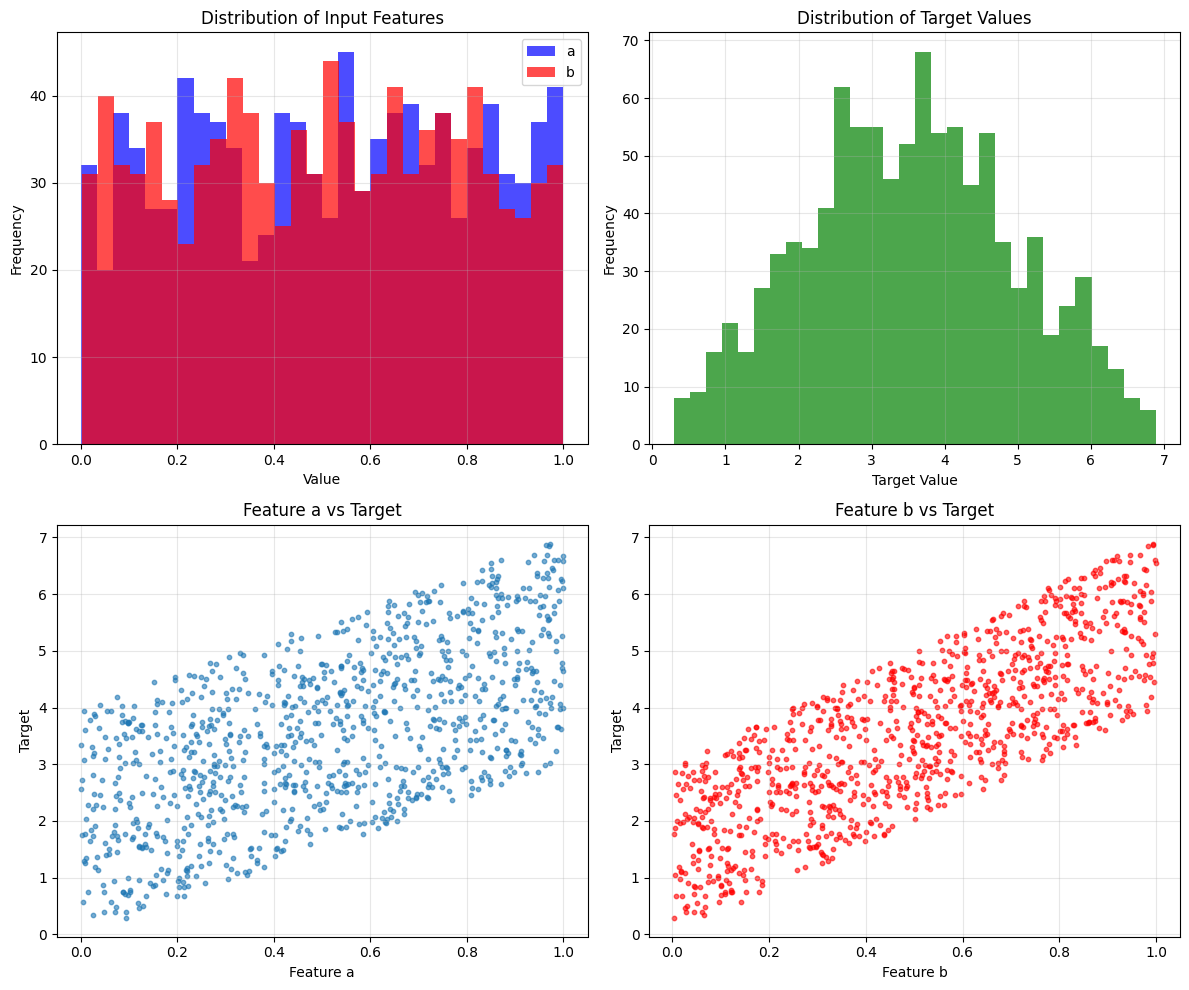

In [5]:
# Visualize the data
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Distribution of inputs
axes[0, 0].hist(train_df['a'], bins=30, alpha=0.7, label='a', color='blue')
axes[0, 0].hist(train_df['b'], bins=30, alpha=0.7, label='b', color='red')
axes[0, 0].set_title('Distribution of Input Features')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution of target
axes[0, 1].hist(train_df['target'], bins=30, alpha=0.7, color='green')
axes[0, 1].set_title('Distribution of Target Values')
axes[0, 1].set_xlabel('Target Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# 3. Scatter plot: a vs target
axes[1, 0].scatter(train_df['a'], train_df['target'], alpha=0.6, s=10)
axes[1, 0].set_title('Feature a vs Target')
axes[1, 0].set_xlabel('Feature a')
axes[1, 0].set_ylabel('Target')
axes[1, 0].grid(True, alpha=0.3)

# 4. Scatter plot: b vs target
axes[1, 1].scatter(train_df['b'], train_df['target'], alpha=0.6, s=10, color='red')
axes[1, 1].set_title('Feature b vs Target')
axes[1, 1].set_xlabel('Feature b')
axes[1, 1].set_ylabel('Target')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Key Insights from EDA

**What we learned:**
- **Input range**: Both `a` and `b` are uniformly distributed between 0 and 1
- **Target range**: Target values range from ~0 to ~7 
- **Linear relationship**: Clear linear patterns visible in scatter plots
- **Correlations**: 
  - `a` has strong positive correlation with target
  - `b` has strong positive correlation with target
  
- Perfect setup for linear regression
- No missing values or outliers
- Good range of values for training

## Build and Train the Linear Regression Model
Using scikit-learn's LinearRegression, which fits using ordinary least squares.

In [6]:
# Create and train the model
model = LinearRegression()

# Fit the model
print("Training the linear regression model...")
model.fit(X_train, y_train)
print("✅ Model training complete!")

# Display model parameters
print(f"\nLearned parameters:")
print(f"Coefficients: a={model.coef_[0]:.4f}, b={model.coef_[1]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"\nExpected equation: target = 3*a + 4*b + 0")
print(f"Learned equation: target = {model.coef_[0]:.4f}*a + {model.coef_[1]:.4f}*b + {model.intercept_:.4f}")

Training the linear regression model...
✅ Model training complete!

Learned parameters:
Coefficients: a=3.0000, b=4.0000
Intercept: -0.0000

Expected equation: target = 3*a + 4*b + 0
Learned equation: target = 3.0000*a + 4.0000*b + -0.0000


## Evaluate the Model

In [7]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("=== Model Performance ===")
print(f"\nTraining Set:")
print(f"  MSE: {train_mse:.6f}")
print(f"  RMSE: {np.sqrt(train_mse):.6f}")
print(f"  R² Score: {train_r2:.6f}")

print(f"\nTest Set:")
print(f"  MSE: {test_mse:.6f}")
print(f"  RMSE: {np.sqrt(test_mse):.6f}")
print(f"  R² Score: {test_r2:.6f}")

=== Model Performance ===

Training Set:
  MSE: 0.000000
  RMSE: 0.000000
  R² Score: 1.000000

Test Set:
  MSE: 0.000000
  RMSE: 0.000000
  R² Score: 1.000000


In [8]:
# Test on specific examples
test_cases = [(1.0, 1.0), (2.0, -1.0), (0.5, 0.5), (-1.0, 2.0)]

print("Testing on specific examples:")
print("Input (a, b) | Prediction | Expected | Error")
print("-" * 50)

for a, b in test_cases:
    pred = model.predict([[a, b]])[0]
    expected = 3*a + 4*b  # The actual function
    error = abs(pred - expected)
    print(f"({a:4.1f}, {b:4.1f})    | {pred:8.3f} | {expected:7.3f} | {error:.3f}")

Testing on specific examples:
Input (a, b) | Prediction | Expected | Error
--------------------------------------------------
( 1.0,  1.0)    |    7.000 |   7.000 | 0.000
( 2.0, -1.0)    |    2.000 |   2.000 | 0.000
( 0.5,  0.5)    |    3.500 |   3.500 | 0.000
(-1.0,  2.0)    |    5.000 |   5.000 | 0.000


## Visualize Model Performance

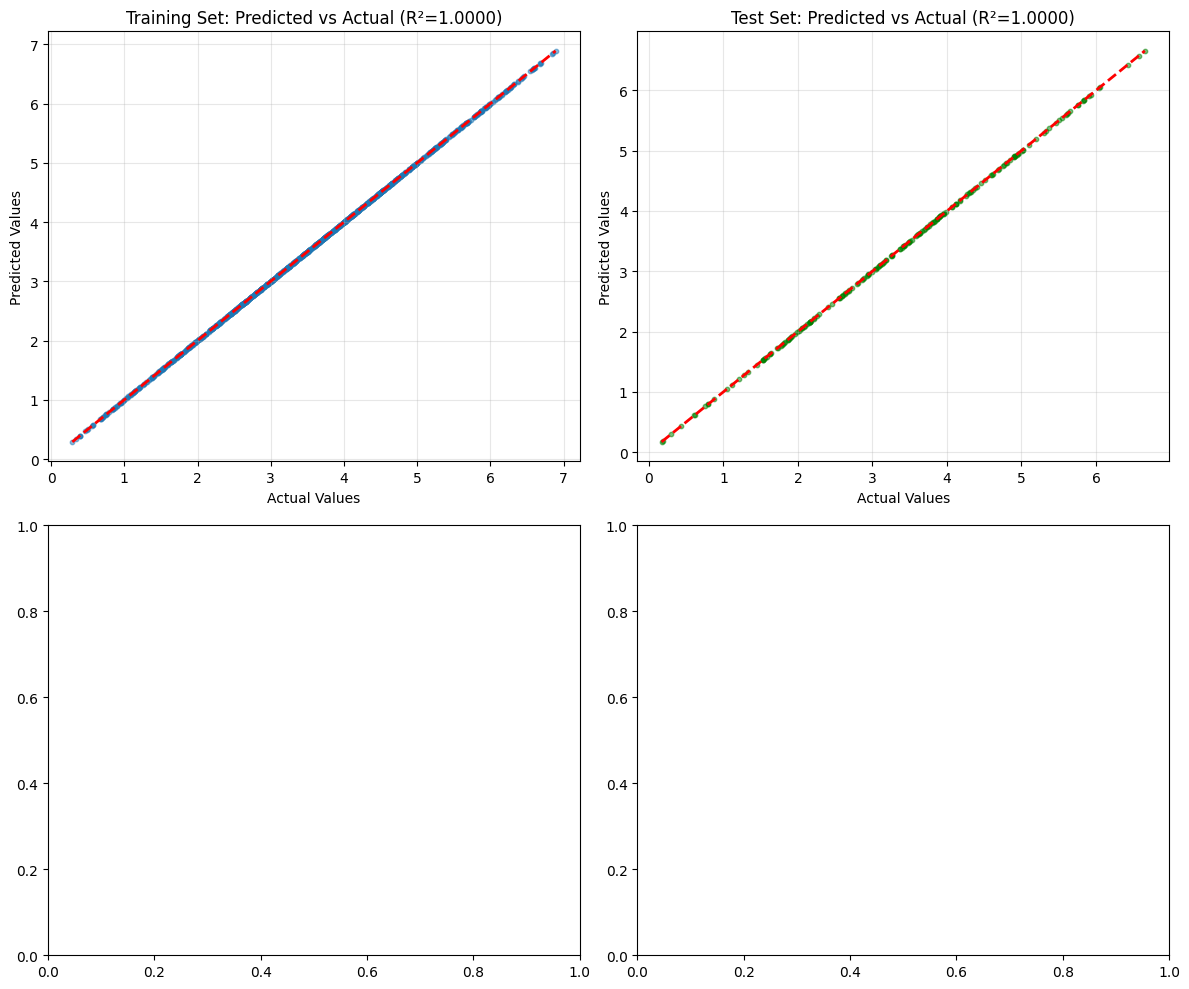

In [9]:
# Visualization of predictions vs actual values
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Training Set: Predicted vs Actual
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.5, s=10)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title(f'Training Set: Predicted vs Actual (R²={train_r2:.4f})')
axes[0, 0].grid(True, alpha=0.3)

# 2. Test Set: Predicted vs Actual
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.5, s=10, color='green')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].set_title(f'Test Set: Predicted vs Actual (R²={test_r2:.4f})')
axes[0, 1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

## Summary

### Model Performance:
- The linear regression model successfully learned the underlying linear relationship
- Very high R² scores (close to 1.0) indicate excellent model fit
- Low MSE/RMSE values show minimal prediction errors

### Key Takeaways:
1. **Scikit-learn's LinearRegression** provides a simple, efficient implementation
2. **No manual gradient descent** needed - uses closed-form solution
3. **Built-in metrics** make evaluation straightforward
4. **Perfect for linear relationships** in the data
